In [106]:
import pandas as pd
import  sqlite3
% matplotlib inline
import pyecharts as ec
import matplotlib.pyplot as plt  
#中文字体显示  
plt.rc('font', family='SimHei', size=13)

In [13]:
con=sqlite3.connect(r'd:\aliyun\www\my_flask\marketPrice\FutureMarketPrice.db')

In [229]:
sql1='''select date,code as code1,close as close1 from "FutureMarketPrice" where code like "RB__01" and oi>50000; '''
sql5='''select date,code as code5,close as close5 from "FutureMarketPrice" where code like "RB__05" and oi>50000; '''
sql10='''select date,code as code10,close as close10 from "FutureMarketPrice" where code like "RB__10" and oi>50000; '''

In [212]:
sql1='''select date,code as code1,close as close1 from "FutureMarketPrice" where code like "RB__01"; '''
sql5='''select date,code as code5,close as close5 from "FutureMarketPrice" where code like "RB__05"; '''
sql10='''select date,code as code10,close as close10 from "FutureMarketPrice" where code like "RB__10" ; '''

In [230]:
rb1=pd.read_sql(sql1,con)
rb5=pd.read_sql(sql5,con)
rb10=pd.read_sql(sql10,con)

In [231]:
rb1.set_index('date',inplace=True)
rb5.set_index('date',inplace=True)
rb10.set_index('date',inplace=True)

In [232]:
df=pd.merge(pd.merge(rb1,rb5,how='inner',left_index=True,right_index=True),rb10,how='inner',left_index=True,right_index=True)

In [233]:
df.to_clipboard()
df.head()

,code1,close1,code5,close5,code10,close10
date,,,,,,
20091126,RB1001,3885.0,RB1005,4494.0,RB1010,4738.0
20091202,RB1001,3766.0,RB1005,4377.0,RB1010,4685.0
20091203,RB1001,3774.0,RB1005,4385.0,RB1010,4704.0
20091204,RB1001,3784.0,RB1005,4374.0,RB1010,4690.0
20091207,RB1001,3775.0,RB1005,4373.0,RB1010,4721.0


In [234]:
df['fm']=df.close10-df.close5
ifs=df.code10>df.code5
df['ifs_2']=ifs

In [235]:
df.loc[ifs,'fm']=df.loc[ifs,'fm']/5
df.loc[~ifs,'fm']=-df.loc[~ifs,'fm']/7

In [236]:
df.to_clipboard()

In [227]:
df.fm.describe()

count    3517.000000
mean      -12.037467
std        34.551258
min      -163.400000
25%       -37.200000
50%        -9.400000
75%         9.200000
max        93.600000
Name: fm, dtype: float64

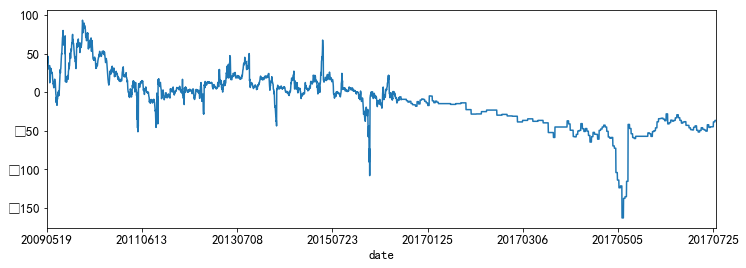

In [228]:
(df.fm).plot(figsize=(12,4))